# **Maestría en Inteligencia Artificial Aplicada**
## Curso: Ciencia de Datos
## Prof María de la Paz Rico Fernández
### Tecnológico de Monterrey



### - Nombre del estudiante: Christian Suarez Gil
### - Matrícula: A01793933
### - Semana 5: Transformación y reducción de dimensiones




# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [2]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= W@D@Winv
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [3]:
#Matriz 1

A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A1)
print(values) #D
print(vectors) #W


values, vectors = np.linalg.eig(A1)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.rint(W@D@Winv).real
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
-----------------------------


In [4]:
#Matriz 2

A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A2)
print(values) #D
print(vectors) #W


values, vectors = np.linalg.eig(A2)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.rint(W@D@Winv).real
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [5]:
#Matriz 3

A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A3)
print(values) #D
print(vectors) #W


values, vectors = np.linalg.eig(A3)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.rint(W@D@Winv).real
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


***Comentario***: Se pudo demostrar para cada una de las matrices que si realizamos el producto punto de :

(La matriz de Valores Proprios) * (La matriz Diagonal de diagonal de valores propios) * (La matriz inversa de valores proprios) 

obtenemos la matriz original, es decir estos 3 componentes son una representación de nuestros datos iniciales, tal como se esperaba.

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


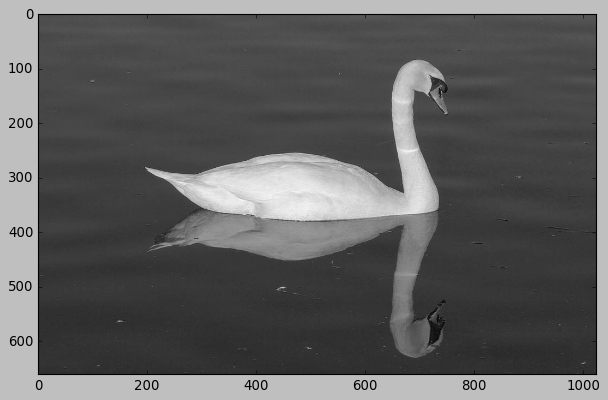

<PIL.Image.Image image mode=LA size=1024x660 at 0x142C74B3EB0>


In [6]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [7]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [8]:
U.shape

(660, 660)

In [9]:
V.shape

(1024, 1024)

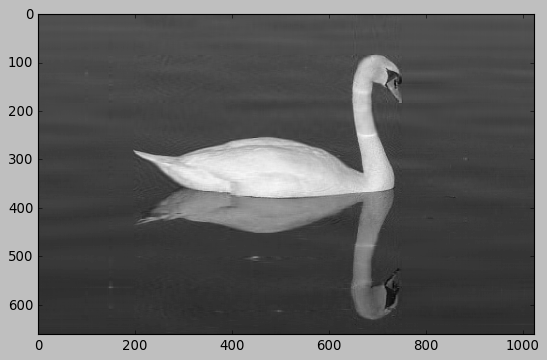

Felicidades la imagen está comprimida


In [14]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50

#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

### Imagen 1

Imagen Original
[244. 244. 243. ...  28.  28.  28.]


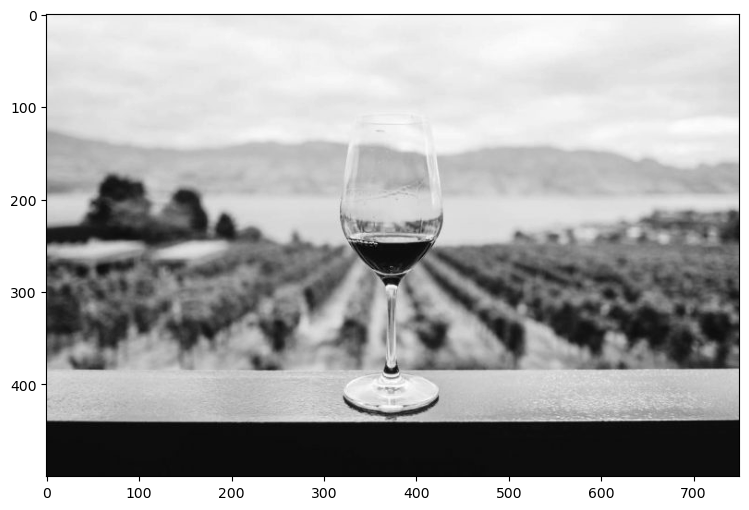

<PIL.Image.Image image mode=LA size=750x500 at 0x142CC5D1100>


In [49]:
#imagen 1
print("Imagen Original")
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/09/vino-750x500.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

Imagen comprimida


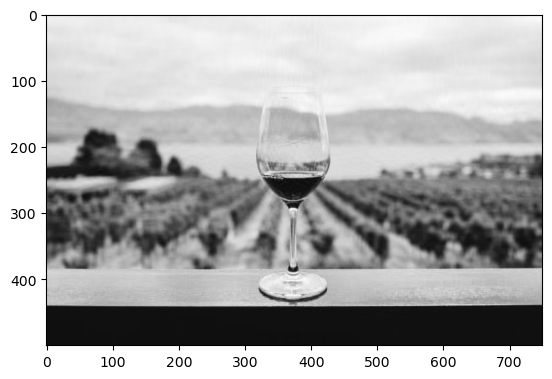

In [51]:
print("Imagen comprimida")
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
nvalue = 60
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()


***Comentario:*** Vemos que nuestra imagen original era de $550x750= U(550X550)D(550X750)V(750X750)$ y mediante el método de Singular Value Decomposition fuimos capaces de reducirla a $U(550X60)*D(60X60)*V(60X750)$ sin perder infomación de que realmente representa la imagen.

### Imagen 2

Imagen Original
[237. 238. 239. ... 159. 152. 149.]


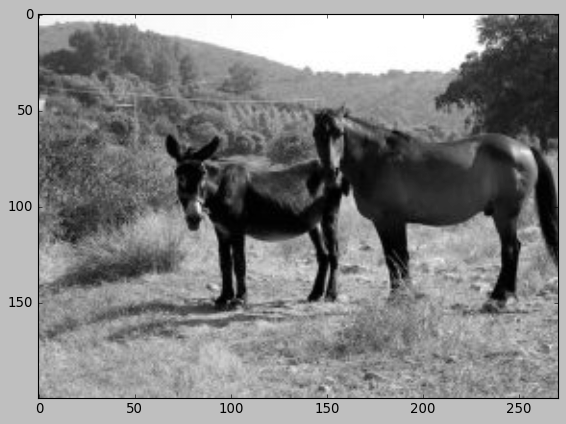

<PIL.Image.Image image mode=LA size=271x200 at 0x142C7AA73A0>


In [22]:
#imagen 1
print("Imagen Original")
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/07/caballo-y-asno-271x200.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

Imagen comprimida


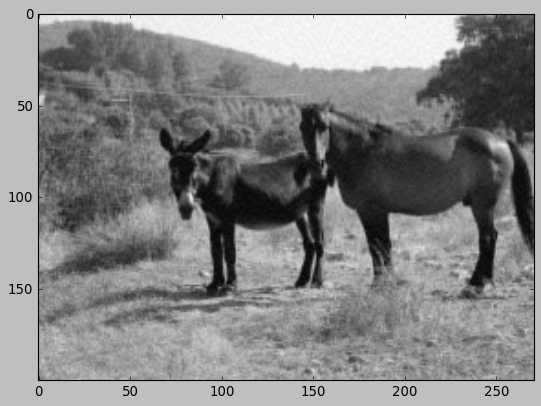

In [26]:
print("Imagen comprimida")
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
nvalue = 80

#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()

***Comentario:*** Vemos que nuestra imagen original era de $200x271= U(200X200)D(200X271)V(271X271)$ y mediante el método de Singular Value Decomposition fuimos capaces de reducirla a $U(200X80)*D(80X80)*V(80X271)$ sin perder infomación de que realmente representa la imagen.

### Imagen 3

Imagen Original
[107. 106. 103. ... 124. 122. 121.]


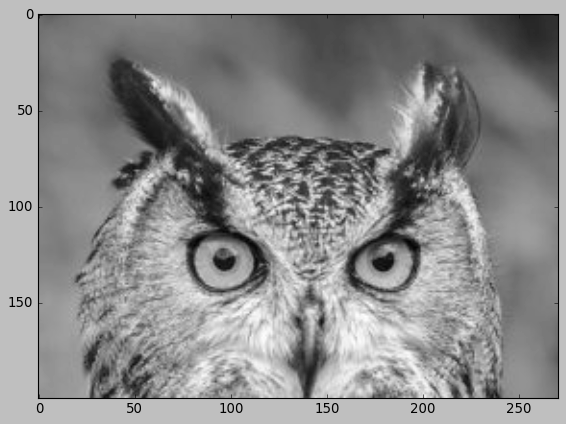

<PIL.Image.Image image mode=LA size=271x200 at 0x142C75EAE80>


In [27]:
#imagen 1
print("Imagen Original")
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/05/simbolismo-buho-271x200.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

Imagen comprimida


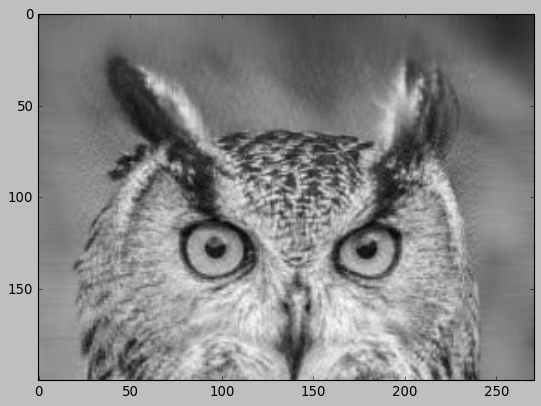

In [30]:
print("Imagen comprimida")
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
nvalue = 60

#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()

***Comentario:*** Vemos que nuestra imagen original era de $200x271= U(200X200)D(200X271)V(271X271)$ y mediante el método de Singular Value Decomposition fuimos capaces de reducirla a $U(200X80)*D(80X80)*V(80X271)$ sin perder infomación de que realmente representa la imagen.

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




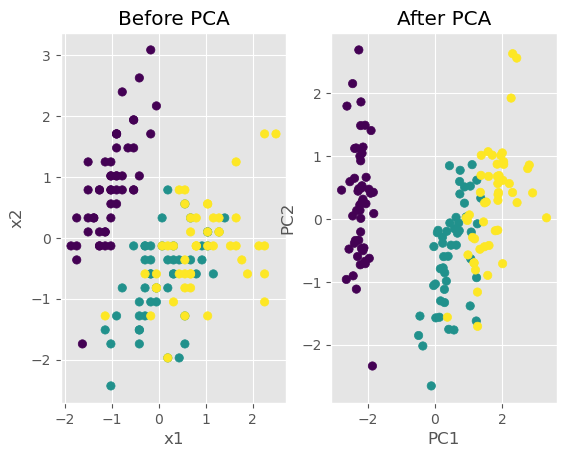

[0.72962445 0.22850762]


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

print(pca.explained_variance_ratio_)


**Comentario**: como podemos ver en la imagen anterior, el método de PCA logró encontrar adecuadamente los sentidos en los que se máxima la variabilidad del data set. Por ejemplo para este problema de clasificacion vemos que estos nuevos componentes nos serían muy utiles para separar adecuadamente las 3 clases mediante cortes verticales sobre el PC1, casi lograríamos una clasificacion perfecta, proceso que se ve mucho mas dificil sobre las variables X1 y X2 originales.

Prueba de de que estamos obteniendo la máxima covarianza

In [55]:
np.cov(X_new.T)

array([[2.93808505e+00, 9.53748639e-17],
       [9.53748639e-17, 9.20164904e-01]])

In [35]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

***Comentario***: podemos ver a partir de los datos anteriores, que el primer componente explica 3 veces más variabilidad que el segundo componente.

Importancia de cada característica

In [36]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


***Comentario:*** podemos observar en los datos anteriores, que el primer y más importante componente está siendo dominado por las variables 1,3 y 4, que a su vez están correlacionadas. Mientras que el segundo componente está dominado por la variable 2, que al parecer es independiente de las variables 3 y 4, pero tiene un poco de correlación con la variable 1

In [37]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

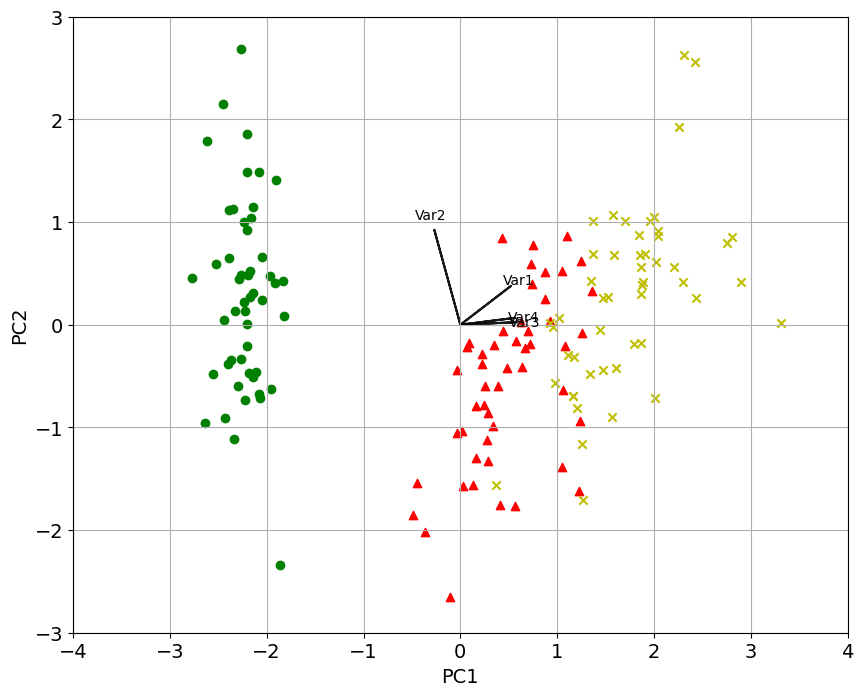

In [38]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

***Comentario***: podemos ver en el Biplot la presentación de las relaciones entre los Componentes proncipales obtenidos. Tenemos correlaciones significativas entre las variables 1,3 y 4, y la variable 2 marcando una mayor independencia de las demás, siendo está la que determina en mayor medida la direccion del componente 2.

In [41]:
# Var 3 and Var 4 are extremely positively correlated
print(np.corrcoef(X[:,2], X[:,3])[1,0])

# Var 2and Var 3 are negatively correlated
print(np.corrcoef(X[:,1], X[:,2])[1,0])


0.9628654314027959
-0.4284401043305397


### Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

¿Qué es feature importance y para que nos sirve?


Feature importance hace referencia a que tan importante es cada una de nuestras variables al explicar la varibilidad del DataSet, mientras más peso tenga una variable en un compomente, quiere decir que está marcando en mayor medida la dirección de ese componente o esa porción de la variabilidad que el componente está explicandp. Así mismo, las variables que tienen mayor peso en los primeros componentes tendrían mayor importancia que las variables que tengan ese mismo peso pero en componentes posteriores.

¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

- Es posible representar una buena cantidad de la variabilidad total de un conjunto de datos, mediante una cantidad muy reducida de componentes principales. Esto, siempre y cuando exista multicolinearidad entre las variables.
- Este tipo de métodos son especialmente útiles cuando la cantidad de variables de un DataSet es grande, como en una imagen. Pero también puede servir para DataSets pequeños, como en el caso del Iris data set.

¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
Este tipo de herramientas las utilizaría en:
- Cualquier tipo de DataSet que sospeche que tiene problemas de colinearidad.
- Como parte del proceso de EDA para detectar relaciones e importancia de las variables.
- Para reducir la dimensionalidad de DataSets con un gran numero de dimensiones
- Para comprimir o eliminar ruido de algunos tipos de data sets. Por ejemplo conjuntos de imagenes.

